In [31]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
from sklearn import metrics
test = pd.read_csv("test.csv")
t = pd.read_csv("train.csv")
sur = pd.read_csv("gender_submission.csv")

In [13]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
t.shape

(891, 12)

In [15]:
t.Sex=nb.where(t.Sex.str.contains("female"),0,1)
t.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [16]:
t["first name"]= t["Name"].str.split(",").str[1]
t["surname"]= t["Name"].str.split(",").str[0]
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first name,surname
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,Allen


In [17]:
t.drop("Name",axis=1,inplace=True)
t.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first name,surname
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Braund
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Heikkinen
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,Allen


In [18]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
first name       0
surname          0
dtype: int64

In [19]:
t.Age.sort_values(ascending=False).sum

<bound method Series.sum of 630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64>

In [20]:
t.Age.fillna(t.Age.mean(), inplace = True)
t.Age =t.Age.astype(int)
t

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first name,surname
0,1,0,3,1,22,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Braund
1,2,1,1,0,38,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Heikkinen
3,4,1,1,0,35,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,1,35,0,0,373450,8.0500,NaN,S,Mr. William Henry,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,211536,13.0000,NaN,S,Rev. Juozas,Montvila
887,888,1,1,0,19,0,0,112053,30.0000,B42,S,Miss. Margaret Edith,Graham
888,889,0,3,0,29,1,2,W./C. 6607,23.4500,NaN,S,"Miss. Catherine Helen ""Carrie""",Johnston
889,890,1,1,1,26,0,0,111369,30.0000,C148,C,Mr. Karl Howell,Behr


In [21]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
first name       0
surname          0
dtype: int64

In [22]:
t.drop('Cabin', axis = 1,inplace = True )
t.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,first name,surname
0,1,0,3,1,22,1,0,A/5 21171,7.2500,S,Mr. Owen Harris,Braund
1,2,1,1,0,38,1,0,PC 17599,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,0,26,0,0,STON/O2. 3101282,7.9250,S,Miss. Laina,Heikkinen
3,4,1,1,0,35,1,0,113803,53.1000,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,1,35,0,0,373450,8.0500,S,Mr. William Henry,Allen


In [23]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
first name     0
surname        0
dtype: int64

In [24]:
t.dropna(inplace = True)

In [25]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
first name     0
surname        0
dtype: int64

In [26]:
t['Ticket'] = t.Ticket.str.extract('(\d+\d+)')
t

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,first name,surname
0,1,0,3,1,22,1,0,21171,7.2500,S,Mr. Owen Harris,Braund
1,2,1,1,0,38,1,0,17599,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,0,26,0,0,3101282,7.9250,S,Miss. Laina,Heikkinen
3,4,1,1,0,35,1,0,113803,53.1000,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,1,35,0,0,373450,8.0500,S,Mr. William Henry,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,211536,13.0000,S,Rev. Juozas,Montvila
887,888,1,1,0,19,0,0,112053,30.0000,S,Miss. Margaret Edith,Graham
888,889,0,3,0,29,1,2,6607,23.4500,S,"Miss. Catherine Helen ""Carrie""",Johnston
889,890,1,1,1,26,0,0,111369,30.0000,C,Mr. Karl Howell,Behr


In [27]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int32  
 4   Age          889 non-null    int32  
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       883 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  first name   889 non-null    object 
 11  surname      889 non-null    object 
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 83.3+ KB


In [28]:
t.Ticket.str.len().max()

7.0

In [29]:
t['Ticket'] = t.Ticket.str.pad(7 ,fillchar ='0')
t

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,first name,surname
0,1,0,3,1,22,1,0,0021171,7.2500,S,Mr. Owen Harris,Braund
1,2,1,1,0,38,1,0,0017599,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,0,26,0,0,3101282,7.9250,S,Miss. Laina,Heikkinen
3,4,1,1,0,35,1,0,0113803,53.1000,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,1,35,0,0,0373450,8.0500,S,Mr. William Henry,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,0211536,13.0000,S,Rev. Juozas,Montvila
887,888,1,1,0,19,0,0,0112053,30.0000,S,Miss. Margaret Edith,Graham
888,889,0,3,0,29,1,2,0006607,23.4500,S,"Miss. Catherine Helen ""Carrie""",Johnston
889,890,1,1,1,26,0,0,0111369,30.0000,C,Mr. Karl Howell,Behr


In [30]:
t.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.498313,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.979638,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


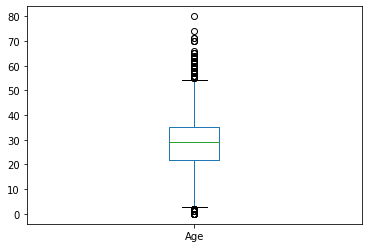

In [31]:
t.Age.plot(kind='box')

In [32]:
t.Age.min()

0

In [33]:
t=t.query('Age > 1')

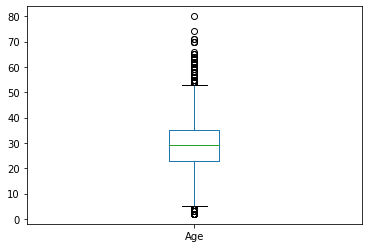

In [23]:
t.Age.plot(kind='box')

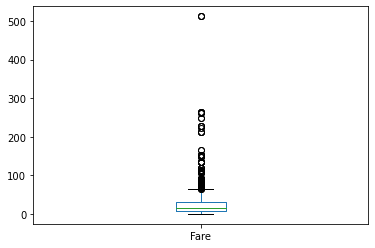

In [24]:
t.Fare.plot(kind='box')

PassengerId    1329.5000
Survived          2.5000
Pclass            4.5000
Sex               2.5000
Age              53.0000
SibSp             2.5000
Parch             0.0000
Fare             64.8958
dtype: float64


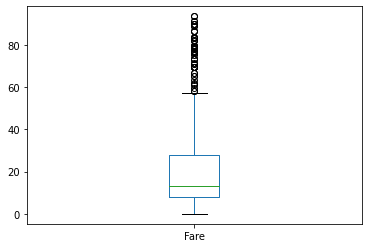

In [25]:
Q1 = t.quantile(0.25)
Q3 = t.quantile(0.75)
IQR = Q3-Q1
Upper_fence = Q3+(IQR*1.5)
print(Upper_fence)
t=t.query('Fare < 100' )
t.Fare.plot(kind='box')

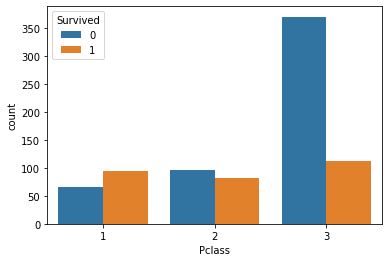

In [26]:
sns.countplot(x=t.Pclass,hue=t.Survived)

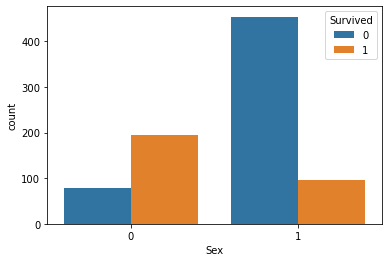

In [27]:
sns.countplot(x=t.Sex,hue=t.Survived)

<BarContainer object of 891 artists>

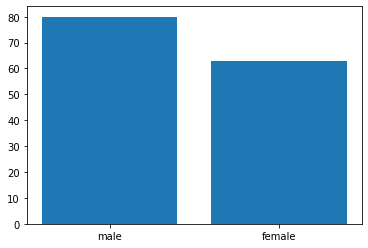

In [50]:
plt.bar(t.Sex,t.Age)

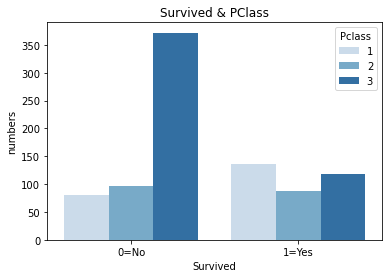

In [43]:
fig=sns.countplot(t['Survived'],hue=t['Pclass'],palette='Blues')
fig.set_xlabel("Survived")
fig.set_ylabel("numbers")
fig.set(xticklabels=["0=No","1=Yes"])
plt.title('Survived & PClass')
plt.show()

(array([ 47.,  46., 176., 329.,  90.,  64.,  41.,  19.,   9.,   2.]),
 array([ 2. ,  9.8, 17.6, 25.4, 33.2, 41. , 48.8, 56.6, 64.4, 72.2, 80. ]),
 <a list of 10 Patch objects>)

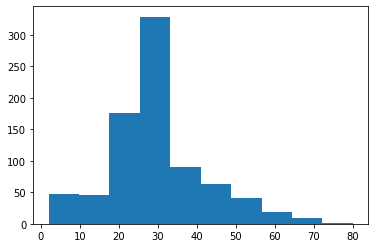

In [63]:
plt.hist(t.Age)

In [29]:
t.shape

(823, 12)

In [30]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  823 non-null    int64  
 1   Survived     823 non-null    int64  
 2   Pclass       823 non-null    int64  
 3   Sex          823 non-null    int32  
 4   Age          823 non-null    int32  
 5   SibSp        823 non-null    int64  
 6   Parch        823 non-null    int64  
 7   Ticket       817 non-null    object 
 8   Fare         823 non-null    float64
 9   Embarked     823 non-null    object 
 10  first name   823 non-null    object 
 11  surname      823 non-null    object 
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 117.2+ KB


In [31]:
t.Ticket.isnull().sum()

6

In [32]:
t.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,first name,surname
0,1,0,3,1,22,1,0,0021171,7.2500,S,Mr. Owen Harris,Braund
1,2,1,1,0,38,1,0,0017599,71.2833,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,0,26,0,0,3101282,7.9250,S,Miss. Laina,Heikkinen
3,4,1,1,0,35,1,0,0113803,53.1000,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,1,35,0,0,0373450,8.0500,S,Mr. William Henry,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,0211536,13.0000,S,Rev. Juozas,Montvila
887,888,1,1,0,19,0,0,0112053,30.0000,S,Miss. Margaret Edith,Graham
888,889,0,3,0,29,1,2,0006607,23.4500,S,"Miss. Catherine Helen ""Carrie""",Johnston
889,890,1,1,1,26,0,0,0111369,30.0000,C,Mr. Karl Howell,Behr


In [33]:
t.Age.min()

2

In [34]:
test.Sex=nb.where(test.Sex.str.contains("female"),0,1)
test.head(25)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S


In [35]:
test["first name"]= test["Name"].str.split(",").str[1]
test["surname"]= test["Name"].str.split(",").str[0]
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first name,surname
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,Mr. James,Kelly
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,Mrs. James (Ellen Needs),Wilkes
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,Mr. Thomas Francis,Myles
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,Mr. Albert,Wirz
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,Mrs. Alexander (Helga E Lindqvist),Hirvonen


In [36]:
test.drop("Name",axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first name,surname
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,Mr. James,Kelly
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,Mrs. James (Ellen Needs),Wilkes
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,Mr. Thomas Francis,Myles
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,Mr. Albert,Wirz
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,Mrs. Alexander (Helga E Lindqvist),Hirvonen


In [37]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
first name       0
surname          0
dtype: int64

In [38]:
test.Age.fillna(test.Age.mean(), inplace = True)
test.Age =test.Age.astype(int)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first name,surname
0,892,3,1,34,0,0,330911,7.8292,NaN,Q,Mr. James,Kelly
1,893,3,0,47,1,0,363272,7.0000,NaN,S,Mrs. James (Ellen Needs),Wilkes
2,894,2,1,62,0,0,240276,9.6875,NaN,Q,Mr. Thomas Francis,Myles
3,895,3,1,27,0,0,315154,8.6625,NaN,S,Mr. Albert,Wirz
4,896,3,0,22,1,1,3101298,12.2875,NaN,S,Mrs. Alexander (Helga E Lindqvist),Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30,0,0,A.5. 3236,8.0500,NaN,S,Mr. Woolf,Spector
414,1306,1,0,39,0,0,PC 17758,108.9000,C105,C,Dona. Fermina,Oliva y Ocana
415,1307,3,1,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr. Simon Sivertsen,Saether
416,1308,3,1,30,0,0,359309,8.0500,NaN,S,Mr. Frederick,Ware


In [39]:
test.drop('Cabin', axis = 1,inplace = True )
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,first name,surname
0,892,3,1,34,0,0,330911,7.8292,Q,Mr. James,Kelly
1,893,3,0,47,1,0,363272,7.0000,S,Mrs. James (Ellen Needs),Wilkes
2,894,2,1,62,0,0,240276,9.6875,Q,Mr. Thomas Francis,Myles
3,895,3,1,27,0,0,315154,8.6625,S,Mr. Albert,Wirz
4,896,3,0,22,1,1,3101298,12.2875,S,Mrs. Alexander (Helga E Lindqvist),Hirvonen


In [40]:
test.Fare.fillna(test.Fare.mean(), inplace = True)


In [41]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
first name     0
surname        0
dtype: int64

In [42]:
x = t[['Age','Pclass','Sex']]
y = t.Survived
v =  test[['Age','Pclass','Sex']]

In [48]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


Import Successful


In [55]:
Model=tree.DecisionTreeClassifier()
Model = Model.fit(x,y)
y_pred = Model.predict(v)
print("accuracy: ",metrics.accuracy_score(sur.Survived,y_pred))

accuracy:  0.8181818181818182


[Text(135.9269171779141, 210.645, 'X[2] <= 0.5\ngini = 0.456\nsamples = 823\nvalue = [533, 290]'),
 Text(65.21411042944786, 197.055, 'X[1] <= 2.5\ngini = 0.41\nsamples = 274\nvalue = [79, 195]'),
 Text(24.6478527607362, 183.465, 'X[0] <= 56.5\ngini = 0.099\nsamples = 134\nvalue = [7, 127]'),
 Text(19.170552147239263, 169.875, 'X[0] <= 23.5\ngini = 0.088\nsamples = 130\nvalue = [6, 124]'),
 Text(16.4319018404908, 156.285, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(21.90920245398773, 156.285, 'X[0] <= 27.5\ngini = 0.115\nsamples = 98\nvalue = [6, 92]'),
 Text(10.954601226993866, 142.695, 'X[0] <= 25.5\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(5.477300613496933, 129.10500000000002, 'X[1] <= 1.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(2.7386503067484664, 115.515, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(8.2159509202454, 115.515, 'X[0] <= 24.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(5.477300613496933, 101.925, 'gini = 0.245\nsamples = 

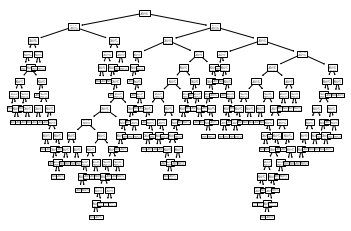

In [56]:
tree.plot_tree(Model) 

In [47]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


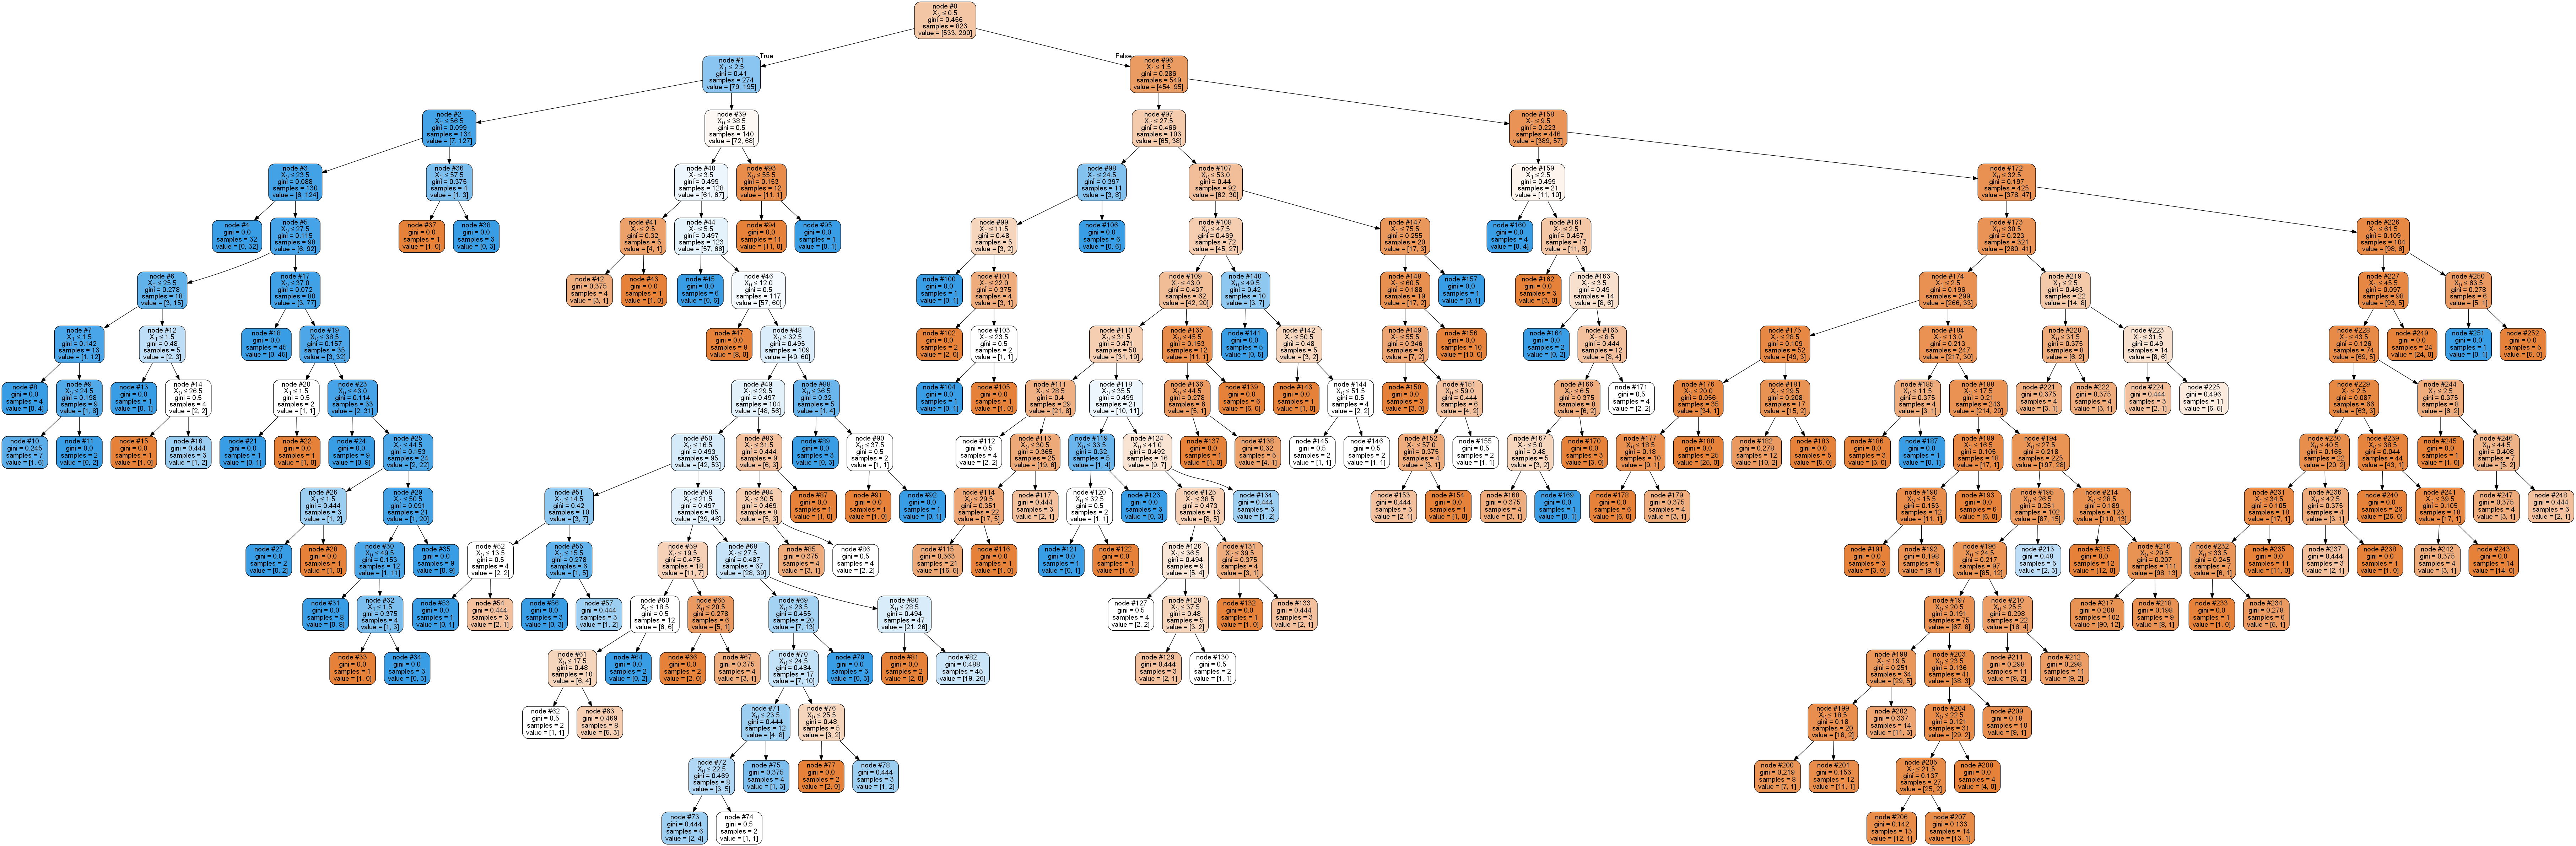

In [64]:
dot_data = StringIO()
export_graphviz(Model, out_file=dot_data, filled = True, rounded = True, special_characters = True, node_ids = True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [44]:
Model=tree.DecisionTreeClassifier(max_depth=3)
Model = Model.fit(x,y)
y_pred = Model.predict(v)

In [45]:
print("accuracy: ",metrics.accuracy_score(sur.Survived,y_pred))

accuracy:  0.9712918660287081


[Text(167.4, 190.26, 'X[2] <= 0.5\ngini = 0.456\nsamples = 823\nvalue = [533, 290]'),
 Text(83.7, 135.9, 'X[1] <= 2.5\ngini = 0.41\nsamples = 274\nvalue = [79, 195]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 56.5\ngini = 0.099\nsamples = 134\nvalue = [7, 127]'),
 Text(20.925, 27.180000000000007, 'gini = 0.088\nsamples = 130\nvalue = [6, 124]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 38.5\ngini = 0.5\nsamples = 140\nvalue = [72, 68]'),
 Text(104.625, 27.180000000000007, 'gini = 0.499\nsamples = 128\nvalue = [61, 67]'),
 Text(146.475, 27.180000000000007, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 1.5\ngini = 0.286\nsamples = 549\nvalue = [454, 95]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 27.5\ngini = 0.466\nsamples = 103\nvalue = [65, 38]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]')

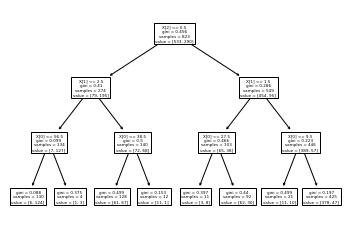

In [46]:
tree.plot_tree(Model) 

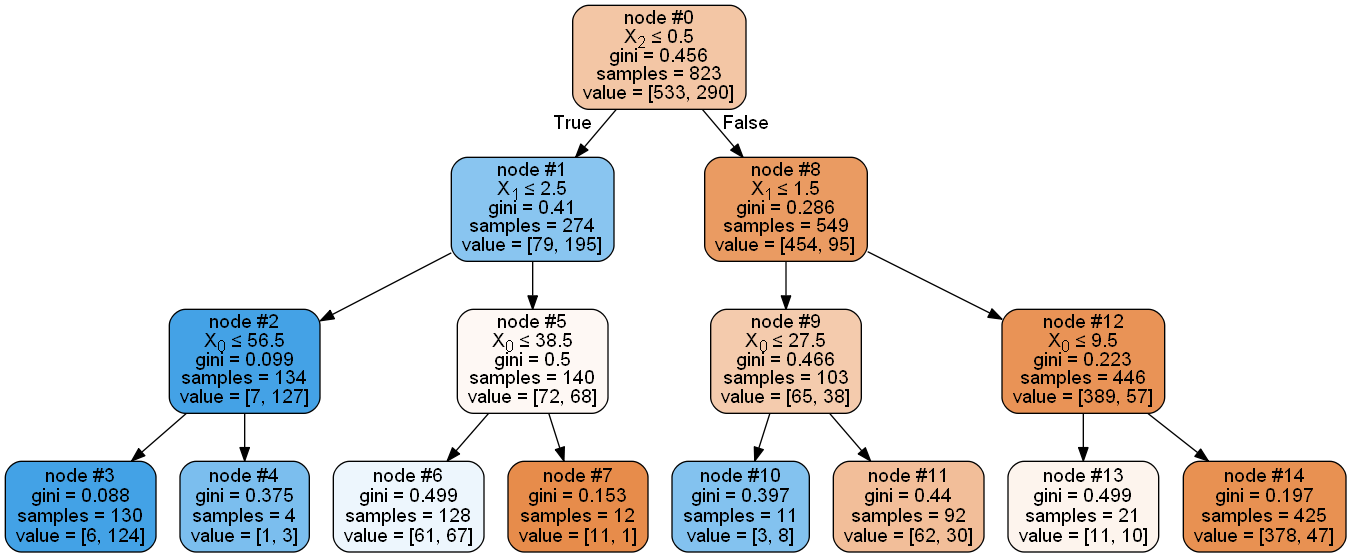

In [49]:
dot_data = StringIO()
export_graphviz(Model, out_file=dot_data, filled = True, rounded = True, special_characters = True, node_ids = True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())